In [2]:
import skimage
import numpy as np
import os
import matplotlib.pyplot as plt
from storm_analysis.spliner.psf_to_spline import psfToSpline
import pickle
from storm_analysis.spliner.spline_to_psf import SplineToPSF3D
from PIL import Image

In [3]:
# load PSF data
psf_stack = skimage.io.imread(os.path.join(os.getcwd(), 'PSF.tif'))
psf_stack = 1e6*psf_stack/np.sum(psf_stack, axis=(1, 2), keepdims=True)
idx_s = np.arange(0, psf_stack.shape[0], 2)
psf_s = psf_stack[idx_s, :, :]

In [ ]:
# dict for spliner
psf_s_dict = {"psf": psf_stack,
              "pixel_size": 0.11,  # um
              "type": "3D",
              "version": 2.0,
              "zmin": -2400,
              "zmax": 1800,
             }

with open('psf_s.pickle', 'wb') as handle:
    pickle.dump(psf_s_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
psfToSpline('psf_s.pickle', 'psf_spline.pickle', 41)

In [5]:
psf_spliner = SplineToPSF3D('psf_spline.pickle')

In [6]:
show_seen_gt = psf_s[np.arange(0, psf_s.shape[0], 2), :, :]
show_seen_spline = np.zeros_like(show_seen_gt)
for i in range(show_seen_spline.shape[0]):
    im_spline = psf_spliner.getPSF(-2400+600*i)
    im = Image.fromarray(im_spline)
    im = im.resize([81, 81])
    show_seen_spline[i, :, :] = im

In [7]:
# photon normalization
show_seen_gt_norm = 1e6*show_seen_gt/np.sum(show_seen_gt, axis=(1, 2), keepdims=True)
show_seen_spline_norm = 1e6*show_seen_spline/np.sum(show_seen_spline, axis=(1, 2), keepdims=True)
# 01normalization
# show_seen_gt_norm = (show_seen_gt-np.min(show_seen_gt, axis=(1,2), keepdims=True))/(np.max(show_seen_gt, axis=(1,2), keepdims=True)-np.min(show_seen_gt, axis=(1,2), keepdims=True))
# show_seen_spline_norm = (show_seen_spline-np.min(show_seen_spline, axis=(1,2), keepdims=True))/(np.max(show_seen_spline, axis=(1,2), keepdims=True)-np.min(show_seen_spline, axis=(1,2), keepdims=True))


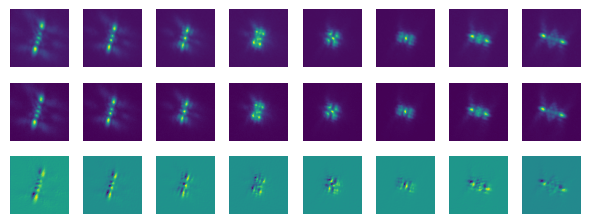

In [8]:
fig = plt.figure(figsize=[6, 2.4])
for i in range(8):
    ax = fig.add_subplot(3, 8, i+1)
    ax.imshow(show_seen_spline_norm[i,:,:])
    ax.axis('off')
    
    ax = fig.add_subplot(3, 8, 9+i)
    ax.imshow(show_seen_gt_norm[i,:,:])
    ax.axis('off')
    
    ax = fig.add_subplot(3, 8, 17+i)
    ax.imshow(show_seen_spline_norm[i,:,:]-show_seen_gt_norm[i,:,:])
    ax.axis('off')

fig.tight_layout()
plt.savefig('seen.png', dpi=300)


In [9]:
show_unseen_gt = psf_stack[np.arange(1, psf_stack.shape[0]-1, 4), :, :]
show_unseen_spline = np.zeros_like(show_unseen_gt)
for i in range(show_unseen_spline.shape[0]):
    im_spline = psf_spliner.getPSF(-2300+600*i)
    im = Image.fromarray(im_spline)
    im = im.resize([81, 81])
    show_unseen_spline[i, :, :] = im

In [10]:
# photon normalization
show_unseen_gt_norm = 1e6*show_unseen_gt/np.sum(show_unseen_gt, axis=(1, 2), keepdims=True)
show_unseen_spline_norm = 1e6*show_unseen_spline/np.sum(show_unseen_spline, axis=(1, 2), keepdims=True)
# 01normalization
# show_unseen_gt_norm = (show_unseen_gt-np.min(show_unseen_gt, axis=(1,2), keepdims=True))/(np.max(show_unseen_gt, axis=(1,2), keepdims=True)-np.min(show_unseen_gt, axis=(1,2), keepdims=True))
# show_unseen_spline_norm = (show_unseen_spline-np.min(show_unseen_spline, axis=(1,2), keepdims=True))/(np.max(show_unseen_spline, axis=(1,2), keepdims=True)-np.min(show_unseen_spline, axis=(1,2), keepdims=True))


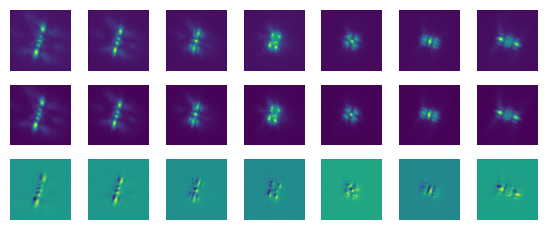

In [11]:
fig = plt.figure(figsize=[5.6, 2.4])
for i in range(7):
    ax = fig.add_subplot(3, 7, i+1)
    ax.imshow(show_unseen_spline_norm[i,:,:])
    ax.axis('off')
    
    ax = fig.add_subplot(3, 7, 8+i)
    ax.imshow(show_unseen_gt_norm[i,:,:])
    ax.axis('off')
    
    ax = fig.add_subplot(3, 7, 15+i)
    ax.imshow(show_unseen_spline_norm[i,:,:]-show_unseen_gt_norm[i,:,:])
    ax.axis('off')

fig.tight_layout()
plt.savefig('unseen.png', dpi=300)